# Tensor Flow

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

In [23]:
# Simple hello world using TensorFlow

# Create a Constant op
# The op is added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
hello_constant = tf.constant('Hello World!')

# Start tf session
#The code creates a session instance, sess, using tf.Session. 
#The sess.run() function then evaluates the tensor and returns the results.
sess = tf.Session()
# Run the tf.constant operation in the session / Run graph
output = sess.run(hello_constant)
sess.close()

print(output)

b'Hello World!'


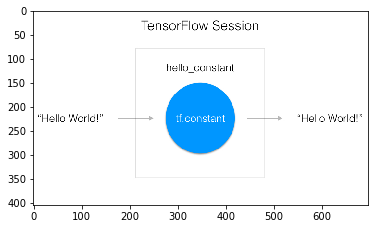

In [24]:
img=mpimg.imread("../images/tensor_flow/session.png")
plt.imshow(img)

## Tensor  Datatypes
In TensorFlow, data isn’t stored as integers, floats, or strings. These values are encapsulated in an object called a tensor. In the case of hello_constant = tf.constant('Hello World!'), hello_constant is a 0-dimensional string tensor, but tensors come in a variety of sizes as shown below:

### 1. Constant

In [25]:
# Basic constant operations
# The value returned by the constructor represents the output
# of the Constant op.

In [27]:
# A is a 0-dimensional int32 tensor
A = tf.constant(1234) 
# B is a 1-dimensional int32 tensor
B = tf.constant([123,456,789]) 
 # C is a 2-dimensional int32 tensor
C = tf.constant([ [123,456,789], [222,333,444] ])

a = tf.constant(2)
b = tf.constant(3)
with tf.Session() as sess:
    print("a=2, b=3")
    print("Addition with constants: %i" % sess.run(a+b))
    print("Multiplication with constants: %i" % sess.run(a*b))

a=2, b=3
Addition with constants: 5
Multiplication with constants: 6


### 2. Placeholder - Input
In the last section, you passed a tensor into a session and it returned the result. What if you want to use a non-constant? This is where tf.placeholder() and feed_dict come into place. In this section, you'll go over the basics of feeding data into TensorFlow.
- Use when you want non-constant values
- Use when a node needs only to hold data and outputs the same without doing any operation

In [28]:
# Basic Operations with variable as graph input
# The value returned by the constructor represents the output
# of the Variable op. (define as input when running session)
# tf Graph input

#As a programer you can think this as a tensor variable declaration with primitive data type
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

# Launch the default graph.
#Pythonic way of managing sessions "with"
with tf.Session() as sess:
    # Run every operation with variable input
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 6


In [29]:
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Test String', y: 123, z: 45.67})
    print(output)
    output = sess.run(y, feed_dict={x: 'Test String', y: 123, z: 45.67})
    print(output)
    output = sess.run(z, feed_dict={x: 'Test String', y: 123, z: 45.67})
    print(output)

Test String
123
45.66999816894531


Say for example if we wanted to do a matrix multiply with constant and a user value

In [30]:
constant = tf.constant([[2.,2.], [2.,2.]]) # 2x2
value = tf.placeholder(tf.float32)

mat_op = tf.matmul(constant, value)

with tf.Session() as sess:
    result = sess.run(mat_op, feed_dict={value: [[2.0,2.0],[2.0,2.0]]})
    print(result)


[[ 8.  8.]
 [ 8.  8.]]


In [1]:
>>> tf.reset_default_graph()

>>> A = tf.placeholder(tf.float32, shape=(None, 3)) #None any number of rows
>>> B = A + 5
>>> with tf.Session() as sess:
...     B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
...     B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})
...
>>> print(B_val_1)
>>> print(B_val_2)

NameError: name 'tf' is not defined

### 3. Variable
- All node values are dropped between graph runs, except variable values,
which are maintained by the session across graph runs (queues and readers
also maintain some state)
- A variable starts its life when its initializer is run, and it ends when the session is closed.

#### Initialization
The tf.Variable class creates a tensor with an initial value that can be modified, much like a normal Python variable. This tensor stores its state in the session, so you must initialize the state of the tensor manually. You'll use the tf.global_variables_initializer() function to initialize the state of all the Variable tensors.

In [46]:
#Much like a static variables
x = tf.Variable(5)
print(x)   
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(x)
    print(sess.run(x))

Tensor("Variable_2/read:0", shape=(), dtype=int32)
Tensor("Variable_2/read:0", shape=(), dtype=int32)
5


### Creating and running a graph

In [48]:
tf.reset_default_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

f

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [36]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(f)
    print(sess.run(f))

Tensor("add_16:0", shape=(), dtype=int32)
42


In [49]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
print(sess.run(f))
sess.close()

42


In [50]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

result

42

In [51]:
init = tf.global_variables_initializer()

with tf.Session():
    init.run()
    result = f.eval()

result

42

In [52]:
init = tf.global_variables_initializer()
#Having to repeat sess.run() all the time is a bit cumbersome, but fortunately there is a better way:    
sess = tf.InteractiveSession()
init.run()
result = f.eval()
sess.close()

result

42

# Typical Tensorflow Program
- Contruction phase
- Execution phase

# Managing Graphs
- Any node you create is automatically added to the default graph

In [39]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [42]:
my_graph = tf.Graph()
with my_graph.as_default():
    x2 = tf.Variable(2)
print(x2.graph is my_graph)
print(x2.graph is tf.get_default_graph())

True
False


In [43]:
tf.reset_default_graph() #reset the default graph

In [53]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())  # 10
    print(z.eval())  # 15

10
15


In [54]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)  # 10
    print(z_val)  # 15

10
15
